# Scientific Programming in Python (SPiP) - Exercises for Programming Basics

by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 

[Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)
   
__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)

# Exercises 

Use the [Python 101 Cheatsheet](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb) as reference


# Exercise 2.1.a: Data Structures
  
Given is the following table with data on when someone likes to play tennis.

<table border="" cellspacing="0" width="48%">
  <tbody><tr>
      <td><b>Day</b></td>
      <td><b>outlook</b></td>
      <td><b>temperature</b></td>
      <td><b>humidity</b></td>
      <td><b>windy</b></td>
      <td><b>play</b></td>
    </tr>
    <tr>
      <td>1</td>
      <td>sunny</td>
      <td>85</td>

      <td>85</td>

      <td>false</td>

      <td>no</td>
    </tr>
    <tr>
      <td>2</td>

      <td>sunny</td>

      <td>80</td>

      <td>90</td>

      <td>true</td>

      <td>no</td>
    </tr>
    <tr>
      <td>3</td>

      <td>overcast</td>

      <td>83</td>

      <td>86</td>

      <td>false</td>

      <td>yes</td>
    </tr>
    <tr>
      <td>4</td>

      <td>rainy</td>

      <td>70</td>

      <td>96</td>

      <td>false</td>

      <td>yes</td>
    </tr>
    <tr>
      <td>5</td>

      <td>rainy</td>

      <td>68</td>

      <td>80</td>

      <td>false</td>

      <td>yes</td>
    </tr>
    <tr>
      <td>6</td>

      <td>rainy</td>

      <td>65</td>

      <td>70</td>

      <td>true</td>

      <td>no</td>
    </tr>
    <tr>
      <td>7</td>

      <td>overcast</td>

      <td>64</td>

      <td>65</td>

      <td>true</td>

      <td>yes</td>
    </tr>
    </tbody>
</table>


* Represent the following table using Python build-in data structures.
* Given that data structure, print 
  - Print the first two and the last two entries in the table
  - Remove every second row
  - Print all lines with outlook sunny

## Exercise 2.1.b: Data Analysis with Python Data Structures

Use the weather data from the exercise on data structures and complete the following tasks:

1. Write a function to count the distribution of the values in a column. The output should be a dictionary (e.g. f(column play)={"yes":7,"no":3})
2. Write a function to filter out rows on a specific attribute and an abritrary criterion (e.g. f(column play="yes)==> only rows where play is yes)
3. Write a function that eliminates particular columns

Given this function, conduct the following analysis:

1. How often do you play tennis independent of the other attributes?
2. How often do you play tennis when it is "sunny"?
3. Compare the average, minimum and maximum temperature when you play tennis?
4. Compare the average, minimum and maximum humidity when you play tennis?
5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperatur (y) when you play tennis compared to when you do not play tennis. Use the following lines of code for a plot:

     <pre><code>
     %pylab inline
     from pylab import *
     figure()
     plot(xdata,ydata)
     title("Title goes here")
     show()</code></pre>


# Solutions

## Solution 2.1.a: Data Structures



In [1]:
labels = ["Day","outlook","temperature","humidity","windy","play"]
data = [[1,"sunny",85,85,"false","no"]
       ,[2,"sunny",80,90,True,"no"]
       ,[3,"overcast",83,86,False,"yes"]
       ,[4,"rainy",70,96,False,"yes"]
       ,[5,"rainy",68,80,False,"yes"]
       ,[6,"rainy",65,70,True,"no"]
       ,[7,"overcast",64,65,True,"yes"]]
print("The Data:")
print(data)

The Data:
[[1, 'sunny', 85, 85, 'false', 'no'], [2, 'sunny', 80, 90, True, 'no'], [3, 'overcast', 83, 86, False, 'yes'], [4, 'rainy', 70, 96, False, 'yes'], [5, 'rainy', 68, 80, False, 'yes'], [6, 'rainy', 65, 70, True, 'no'], [7, 'overcast', 64, 65, True, 'yes']]


In [2]:
print("------------------------------------------------")
print("Printing first two and last two items")
print(data[0:2], "\n")
print(data[-2:])
print("------------------------------------------------")
print("Removing every second line")
del data[1::2]
print(data)
print("------------------------------------------------")
print("Showing all remaining records with outlook sunny")
print([ i for i in data if i[1]=="sunny"])

------------------------------------------------
Printing first two and last two items
[[1, 'sunny', 85, 85, 'false', 'no'], [2, 'sunny', 80, 90, True, 'no']] 

[[6, 'rainy', 65, 70, True, 'no'], [7, 'overcast', 64, 65, True, 'yes']]
------------------------------------------------
Removing every second line
[[1, 'sunny', 85, 85, 'false', 'no'], [3, 'overcast', 83, 86, False, 'yes'], [5, 'rainy', 68, 80, False, 'yes'], [7, 'overcast', 64, 65, True, 'yes']]
------------------------------------------------
Showing all remaining records with outlook sunny
[[1, 'sunny', 85, 85, 'false', 'no']]


## Solution 2.1.b: Data Analysis with Python Data Structures

**First**, the function definition


In [3]:
#imperative style
def distribution(fn_val,data):
    """
      fn_val is a function selecting the column to count
      data is the data set itself
    """
    dist = {}
    for row in data:
        val = fn_val(row)
        if val in dist.keys():
           dist[val]+=1
        else:
           dist[val]=1
    return dist

#more functional style - the Pythonian way
def distribution2(fn_val,data):
    vals = [fn_val(row) for row in data]
    return {x:vals.count(x) for x in vals}

def slice_it(fn_select,data,indizes):
    """
      creates a sub nested list from data by selecting rows (fn_select) and columns )(indices)
      fn_select is a function f(row)--> Bool for selecting the row
      data is the data set itself
      indizes is the column indices that should be contained in the returned array.
    """
    rows =[row for row in data if fn_select(row)]
    return [[row[i] for i in indizes ] for row in rows]

def unfold(a_list):
    return [item for sublist in a_list for item in sublist]

**Second** the data.

In [4]:
data = [[1,"sunny",85,85,"false","no"]
       ,[2,"sunny",80,90,True,"no"]
       ,[3,"overcast",83,86,False,"yes"]
       ,[4,"rainy",70,96,False,"yes"]
       ,[5,"rainy",68,80,False,"yes"]
       ,[6,"rainy",65,70,True,"no"]
       ,[7,"overcast",64,65,True,"yes"]]

**Third,** calculate distributions

In [5]:
print("I play tennis ", distribution2(lambda x:x[5],data)["yes"], " days out of ", len (data))
print("I play tennis ", distribution(lambda x:x[5],data)["yes"], " days out of ", len (data))
sunny_and_play = distribution(lambda x:x[0],slice_it(lambda x:x[1]=="sunny", data,[5]))
if not "yes" in sunny_and_play.keys():
    sunny_and_play["yes"]=0
print("I played tennis %d times when it is sunny"% sunny_and_play["yes"])

I play tennis  4  days out of  7
I play tennis  4  days out of  7
I played tennis 0 times when it is sunny


**Fourth**, slice and calculate aggregations

In [6]:
playing = unfold(slice_it(lambda x:x[5]=="yes", data,[2]))
min_val= min(playing)
max_val=max(playing)
sum_val=sum(playing)/len(playing)
print("I love playing tennis when it is warmer than %f but colder than %f. Best is at %f"%(min_val , max_val,sum_val))

playing = unfold(slice_it(lambda x:x[5]=="yes", data,[3]))
min_val= min(playing)
max_val=max(playing)
sum_val=sum(playing)/len(playing)
print("I love playing tennis when it is less humid than %f but more humid than %f. Best is at %f"%(min_val , max_val,sum_val))

I love playing tennis when it is warmer than 64.000000 but colder than 83.000000. Best is at 71.250000
I love playing tennis when it is less humid than 65.000000 but more humid than 96.000000. Best is at 81.750000


**Finally**, do the plotting

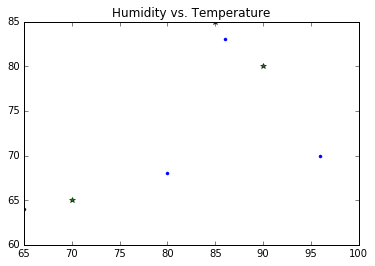

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt #load plotting library
plt.figure()
plt.plot(unfold(slice_it(lambda x:x[5]=="yes", data,[3])),unfold(slice_it(lambda x:x[5]=="yes", data,[2])),".")
plt.plot(unfold(slice_it(lambda x:x[5]=="no", data,[3])),unfold(slice_it(lambda x:x[5]=="no", data,[2])),"*")
plt.title("Humidity vs. Temperature")
plt.show()